___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Indest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
sns.boxplot

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

In [7]:
ind = df.Age.sort_values().index

<AxesSubplot:xlabel='Age', ylabel='Exited'>

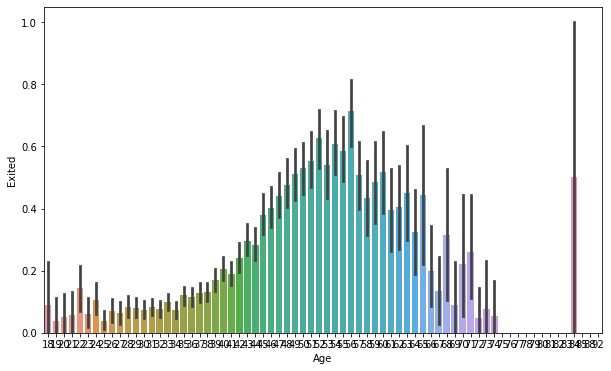

In [8]:
sns.barplot(y=df.Exited[ind], x=df.Age.sort_values(), data=df)

<AxesSubplot:xlabel='CreditScore'>

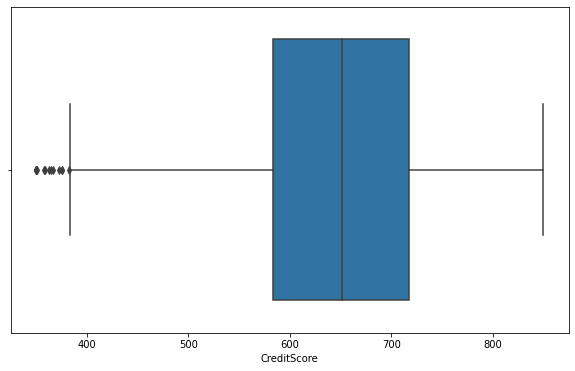

In [9]:
sns.boxplot(df["CreditScore"])

<AxesSubplot:xlabel='EstimatedSalary'>

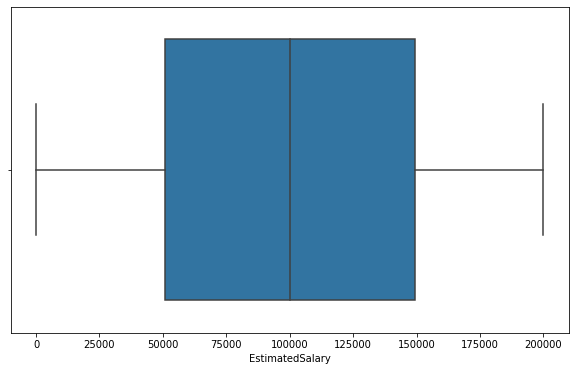

In [10]:
sns.boxplot(df.EstimatedSalary)

<AxesSubplot:xlabel='Exited', ylabel='count'>

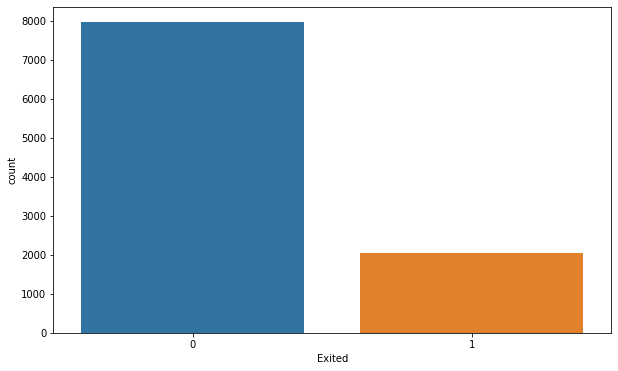

In [11]:
sns.countplot(df.Exited)

In [12]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [13]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df = pd.get_dummies(df)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


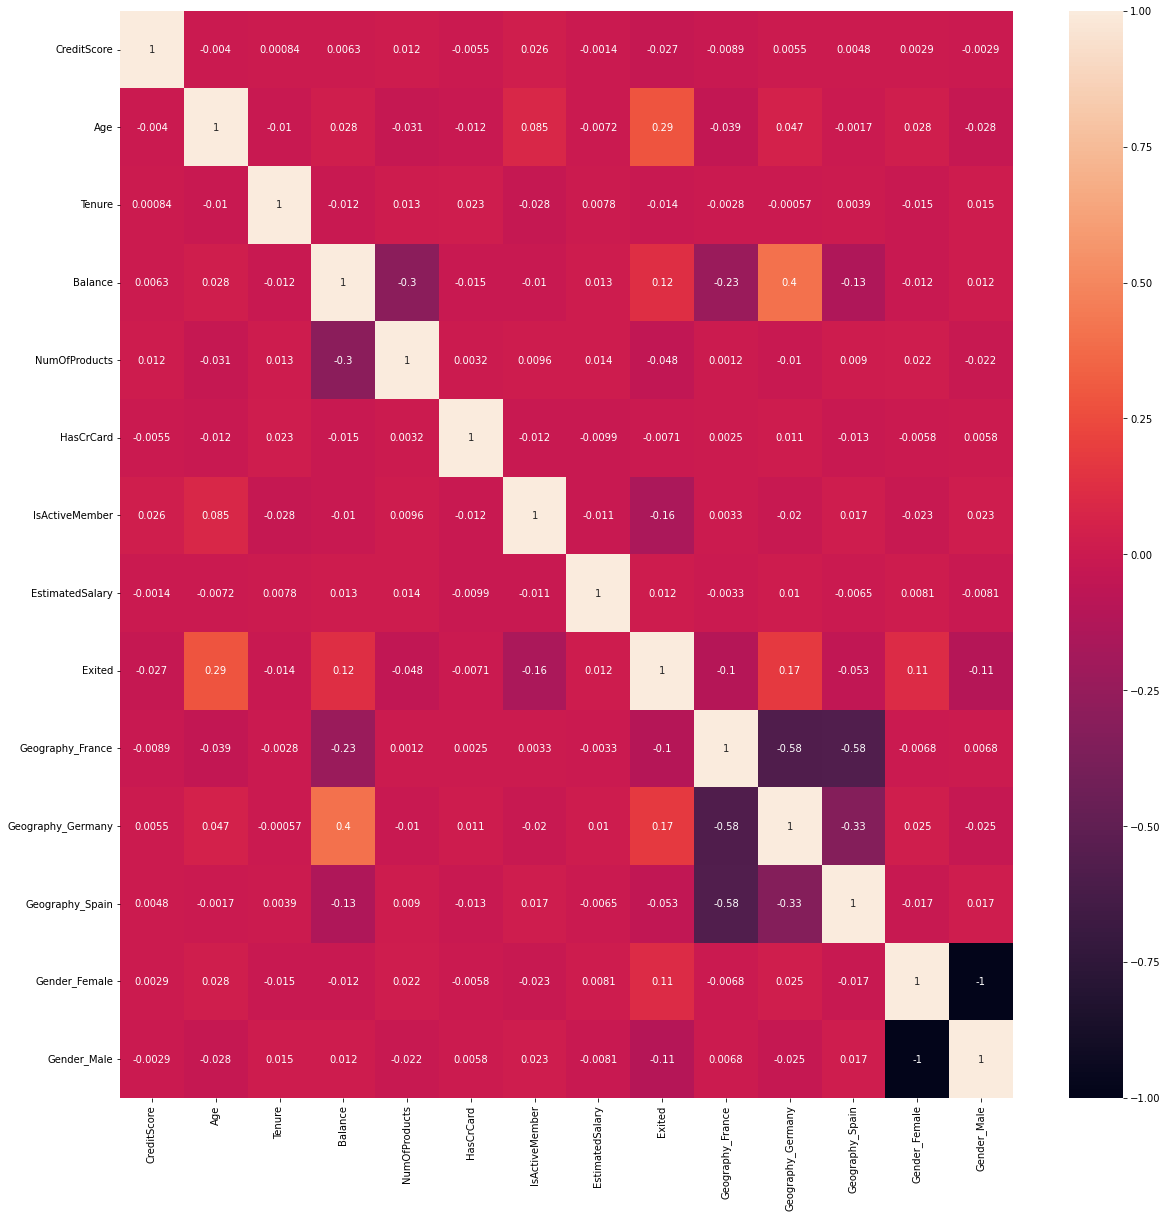

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

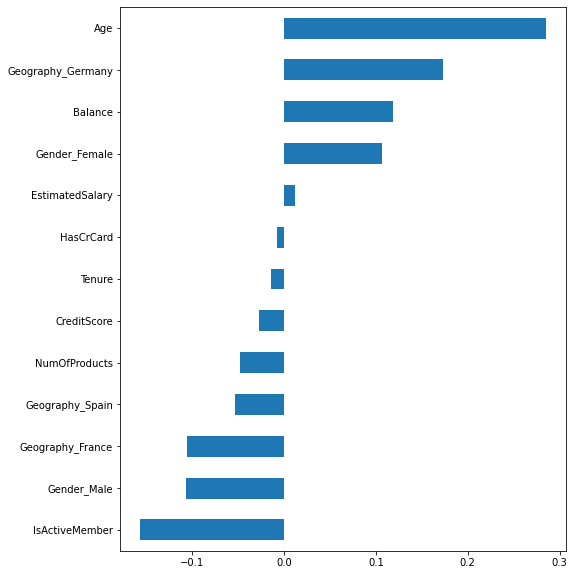

In [26]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [18]:
seed = 42

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
tf.__version__

'2.8.0'

In [30]:
X_train.shape

(9000, 13)

In [29]:
X_test.shape

(1000, 13)

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4970 - accuracy: 0.7943 - val_loss: 0.4468 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7977 - val_loss: 0.4270 - val_accuracy: 0.8189
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8106 - val_loss: 0.4100 - val_accuracy: 0.8300
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8194 - val_loss: 0.4023 - val_accuracy: 0.8356
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8240 - val_loss: 0.3938 - val_accuracy: 0.8411
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8281 - val_loss: 0.3882 - val_accuracy: 0.8367
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8328 - val_loss: 0.3805 - val_accuracy:

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.497013,0.794321,0.446838,0.800000
1,0.462007,0.797654,0.426965,0.818889
2,0.442059,0.810617,0.410001,0.830000
3,0.425648,0.819383,0.402319,0.835556
4,0.414686,0.823951,0.393800,0.841111


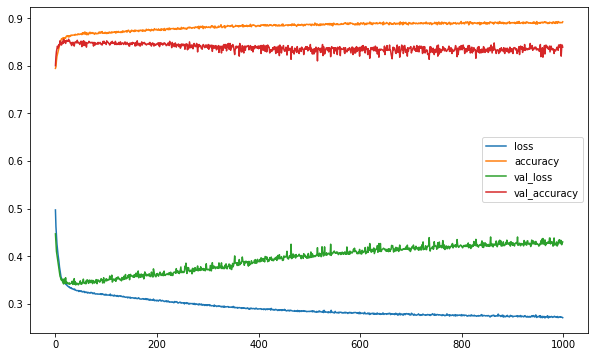

In [37]:
loss_df.plot();

In [38]:
model.evaluate(X_test, y_test, verbose=0)

[0.40465280413627625, 0.8479999899864197]

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.40465280413627625
accuracy :  0.8479999899864197


In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[760  49]
 [103  88]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       809
           1       0.64      0.46      0.54       191

    accuracy                           0.85      1000
   macro avg       0.76      0.70      0.72      1000
weighted avg       0.84      0.85      0.84      1000



### Early Stopping

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [44]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.7943 - val_loss: 0.4468 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7977 - val_loss: 0.4270 - val_accuracy: 0.8189
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8106 - val_loss: 0.4100 - val_accuracy: 0.8300
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8194 - val_loss: 0.4023 - val_accuracy: 0.8356
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8240 - val_loss: 0.3938 - val_accuracy: 0.8411
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8281 - val_loss: 0.3882 - val_accuracy: 0.8367
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8328 - val_loss: 0.3805 - val_accuracy:

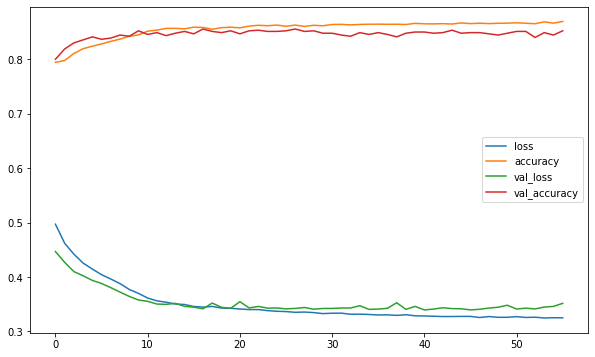

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34170523285865784
accuracy :  0.8640000224113464


In [47]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[790  19]
 [117  74]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       809
           1       0.80      0.39      0.52       191

    accuracy                           0.86      1000
   macro avg       0.83      0.68      0.72      1000
weighted avg       0.86      0.86      0.84      1000



### learning_rate

In [48]:
from tensorflow.keras.optimizers import Adam

In [49]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7973 - val_loss: 0.4340 - val_accuracy: 0.8067
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8211 - val_loss: 0.3724 - val_accuracy: 0.8433
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8463 - val_loss: 0.3630 - val_accuracy: 0.8444
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8512 - val_loss: 0.3565 - val_accuracy: 0.8556
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8528 - val_loss: 0.3483 - val_accuracy: 0.8556
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8556 - val_loss: 0.3465 - val_accuracy: 0.8567
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8578 - val_loss: 0.3411 - val_accuracy:

<AxesSubplot:>

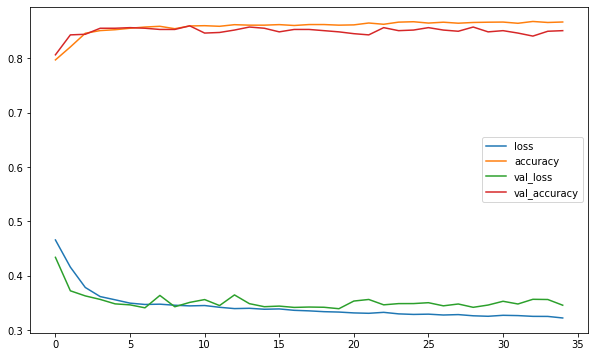

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3385334312915802
accuracy :  0.8569999933242798


In [54]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[776  33]
 [110  81]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       809
           1       0.71      0.42      0.53       191

    accuracy                           0.86      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.84      0.86      0.84      1000



### Dropout

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [57]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.5559 - accuracy: 0.7775 - val_loss: 0.4733 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5082 - accuracy: 0.7951 - val_loss: 0.4622 - val_accuracy: 0.8000
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7944 - val_loss: 0.4468 - val_accuracy: 0.8000
Epoch 4/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4900 - accuracy: 0.7943 - val_loss: 0.4466 - val_accuracy: 0.8000
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4840 - accuracy: 0.7943 - val_loss: 0.4427 - val_accuracy: 0.8000
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7942 - val_loss: 0.4388 - val_accuracy: 0.8000
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.7941 - val_loss: 0.4305 - val_accuracy:

<AxesSubplot:>

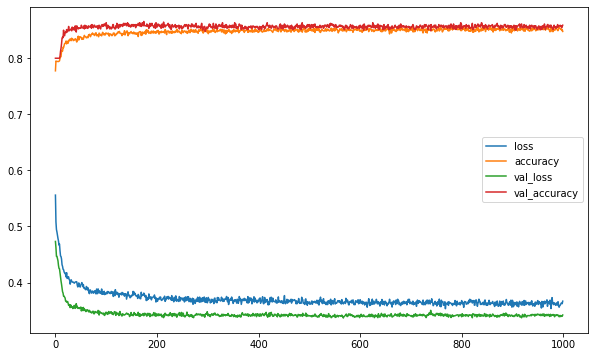

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [59]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3373974561691284
accuracy :  0.8640000224113464


In [60]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[783  26]
 [110  81]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       809
           1       0.76      0.42      0.54       191

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.73      1000
weighted avg       0.85      0.86      0.85      1000



### Creating Model

### without class_weigth

#### Evaluate

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

#### Evaluate

## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [65]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [61]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [62]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [63]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [66]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
254/254 [==============================] - 1s 3ms/step - loss: 0.4659 - accuracy: 0.7973 - val_loss: 0.4340 - val_accuracy: 0.8067
Epoch 2/200
254/254 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8211 - val_loss: 0.3724 - val_accuracy: 0.8433
Epoch 3/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8463 - val_loss: 0.3630 - val_accuracy: 0.8444
Epoch 4/200
254/254 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.8512 - val_loss: 0.3565 - val_accuracy: 0.8556
Epoch 5/200
254/254 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8528 - val_loss: 0.3483 - val_accuracy: 0.8556
Epoch 6/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8556 - val_loss: 0.3465 - val_accuracy: 0.8567
Epoch 7/200
254/254 [==============================] - 0s 2ms/step - loss: 0.34

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001AF0BD82430>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

#### Evaluate

In [67]:
grid_model.best_score_

0.8591111111111112

In [68]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [69]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.854778,0.010447,16,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.857000,0.009297,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
2,0.794667,0.011087,22,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.857333,0.014420,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.858556,0.012502,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.857222,0.012874,9,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
6,0.794889,0.011279,19,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.856444,0.011470,12,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.859111,0.010770,1,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.858000,0.014714,6,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


### ROC AUC 

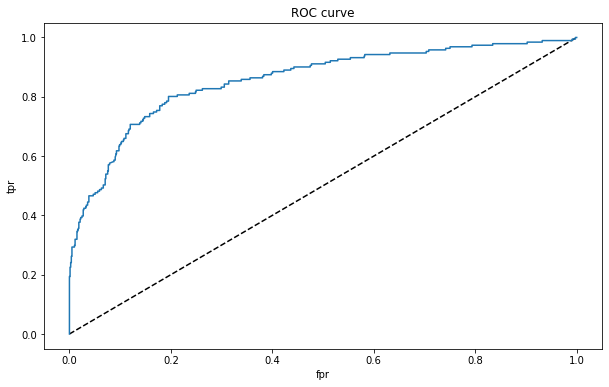

In [70]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [71]:
roc_auc_score(y_test, y_pred_proba)

0.8566033950517413

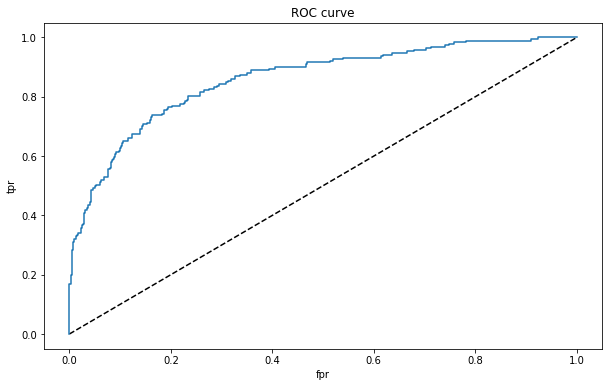

In [72]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [73]:
roc_auc_score(y_test, y_pred_proba)

0.8585610831030488

## Final Model and Model Deployment

In [74]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [75]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [76]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [77]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.5059 - accuracy: 0.7949 - val_loss: 0.4563 - val_accuracy: 0.8090
Epoch 2/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7948 - val_loss: 0.4432 - val_accuracy: 0.8110
Epoch 3/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7982 - val_loss: 0.4284 - val_accuracy: 0.8200
Epoch 4/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8090 - val_loss: 0.4229 - val_accuracy: 0.8120
Epoch 5/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8177 - val_loss: 0.4012 - val_accuracy: 0.8220
Epoch 6/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8237 - val_loss: 0.3959 - val_accuracy: 0.8210
Epoch 7/1000
141/141 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8270 - val_loss: 0.3926 - val_accuracy:

<AxesSubplot:>

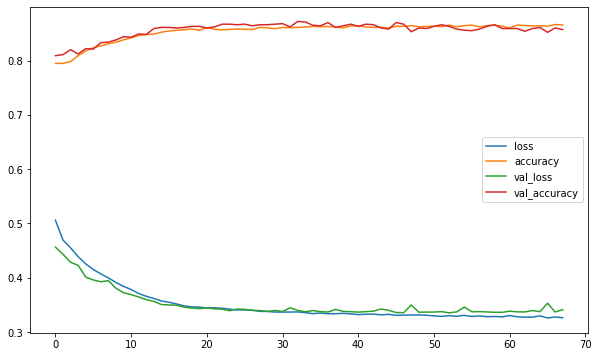

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34121397137641907
accuracy :  0.8569999933242798


In [82]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[770  39]
 [104  87]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       809
           1       0.69      0.46      0.55       191

    accuracy                           0.86      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.86      0.85      1000



In [83]:
model.save('model_churn.h5')

### Prediction

In [102]:
single_pred = df.drop('Exited', axis = 1).iloc[1:2, :]
single_pred

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0


In [103]:
single_pred = scaler.transform(single_pred)
single_pred

array([[0.516     , 0.31081081, 0.1       , 0.33403148, 0.        ,
        0.        , 1.        , 0.56276992, 0.        , 0.        ,
        1.        , 1.        , 0.        ]])

In [104]:
(model.predict(single_pred) > 0.5).astype("int32")
#model.predict_classes(single_pred)

array([[0]])

In [105]:
df["Exited"].iloc[1]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___